In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('C:/Users/Swalllow1219/Desktop/Kaggle_Practice/Data/london_merged.csv', parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [6]:
print('Data Shape : ', df.shape)
print('Data Type : ', df.dtypes)
print('Data Columns : ', df.columns)

Data Shape :  (17414, 10)
Data Type :  timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
Data Columns :  Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [7]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


dayofweek
monday = 0
...
sunday = 6

In [8]:
df['year'].value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

In [19]:
df['year'].value_counts(sort=False)

2015    8643
2016    8699
2017      72
Name: year, dtype: int64

In [16]:
df['month'].value_counts()

5     1488
1     1487
8     1484
12    1484
7     1481
10    1479
3     1468
4     1438
11    1430
6     1422
9     1394
2     1359
Name: month, dtype: int64

In [20]:
df['dayofweek'].value_counts()

0    2508
6    2505
1    2505
3    2492
2    2489
5    2465
4    2450
Name: dayofweek, dtype: int64

In [21]:
df['weather_code'].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

C:\Users\Swalllow1219\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='cnt'>

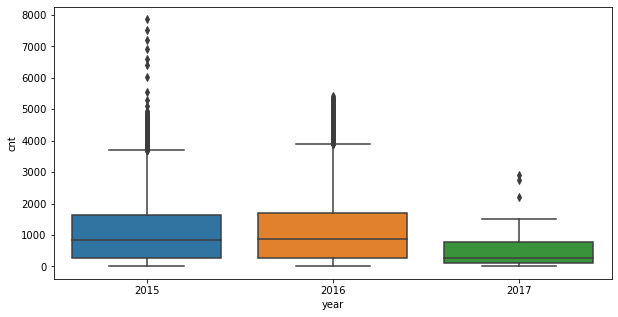

In [23]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(df['year'],df['cnt'])

C:\Users\Swalllow1219\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='cnt'>

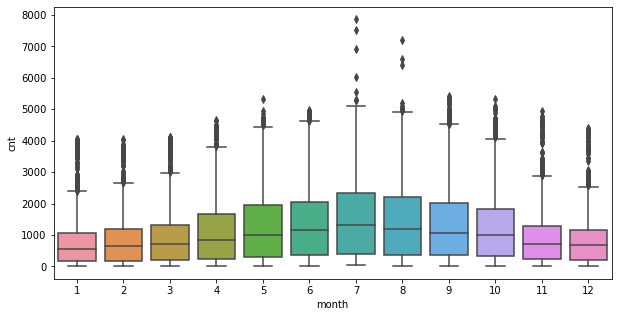

In [24]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(df['month'],df['cnt'])

C:\Users\Swalllow1219\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dayofweek', ylabel='cnt'>

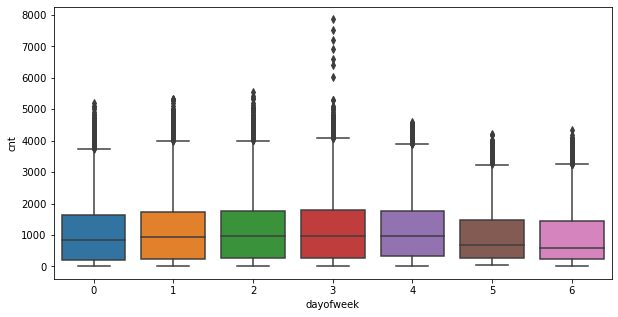

In [26]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(df['dayofweek'],df['cnt'])

C:\Users\Swalllow1219\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='cnt'>

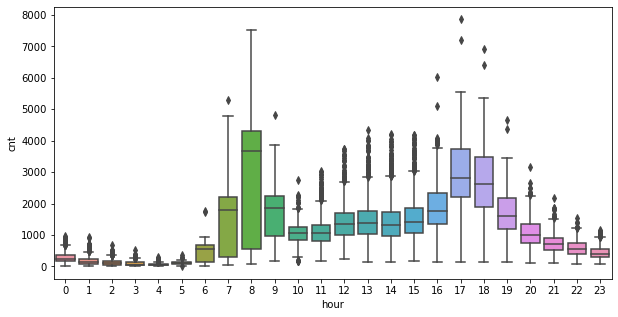

In [27]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(df['hour'],df['cnt'])